<a href="https://colab.research.google.com/github/JiaLong0209/coding365/blob/master/AI_python/AI/cifar10/final6_91_vgg16_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

print(train_labels.shape, test_labels.shape)

target_size = (32,32,3)

base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=target_size,
    include_top=False)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 10) (10000, 10)
58889256/58889256 [==============================] - 2s 0us/step


In [2]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [3]:
base_model.trainable = False

In [4]:

inputs = keras.Input(shape=target_size)
x = base_model(inputs, training=False)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.1)(x)

outputs = keras.layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0     

In [5]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    # vertical_flip=True
)

# train_images, train_labels = train_images[:1] , train_labels[:1]

# showImage(train_images, train_labels)

new_images = np.repeat(train_images, 2, axis=0)
new_labels = np.repeat(train_labels, 2, axis=0)
batch_size =  len(new_images)

print(train_images.shape)
print(new_images.shape)


datagen.fit(new_images)

# img_iter = datagen.flow(new_images, new_labels, batch_size=batch_size)
# x, y = img_iter.next()
# print(x.shape, y.shape)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
base_model.trainable = True


(50000, 32, 32, 3)
(100000, 32, 32, 3)


In [7]:
batch_size = 256
base_model.trainable = False
# print(train_images.shape, train_labels.shape)

model.compile(
            optimizer='rmsprop',
            # optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )


history = model.fit(
                    # train_images, train_labels,
                    datagen.flow(new_images, new_labels, batch_size=batch_size),
                    # x,y,
                    epochs=10,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
)

Epoch 1/20
391/391 [==============================] - 77s 167ms/step - loss: 1.5390 - accuracy: 0.4542 - val_loss: 1.3057 - val_accuracy: 0.5379
Epoch 2/20
391/391 [==============================] - 61s 155ms/step - loss: 1.3836 - accuracy: 0.5098 - val_loss: 1.2387 - val_accuracy: 0.5591
Epoch 3/20
391/391 [==============================] - 61s 155ms/step - loss: 1.3374 - accuracy: 0.5260 - val_loss: 1.2514 - val_accuracy: 0.5569
Epoch 4/20
391/391 [==============================] - 60s 153ms/step - loss: 1.3133 - accuracy: 0.5347 - val_loss: 1.1792 - val_accuracy: 0.5825
Epoch 5/20
391/391 [==============================] - 61s 156ms/step - loss: 1.2829 - accuracy: 0.5469 - val_loss: 1.2217 - val_accuracy: 0.5732
Epoch 6/20
391/391 [==============================] - 62s 158ms/step - loss: 1.2647 - accuracy: 0.5523 - val_loss: 1.1632 - val_accuracy: 0.5953
Epoch 7/20
391/391 [==============================] - 61s 155ms/step - loss: 1.2463 - accuracy: 0.5585 - val_loss: 1.1520 - val_ac

In [8]:
base_model.trainable = True
batch_size = 128

# print(train_images.shape, train_labels.shape)

model.compile(
            # optimizer='rmsprop',
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
            # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )


history = model.fit(
                    # train_images, train_labels,
                    datagen.flow(new_images, new_labels, batch_size=batch_size),
                    # x,y,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
782/782 [==============================] - 83s 95ms/step - loss: 1.2592 - accuracy: 0.5572 - val_loss: 0.7362 - val_accuracy: 0.7445
Epoch 2/40
782/782 [==============================] - 75s 96ms/step - loss: 0.7635 - accuracy: 0.7388 - val_loss: 0.6909 - val_accuracy: 0.7655
Epoch 3/40
782/782 [==============================] - 72s 92ms/step - loss: 0.6319 - accuracy: 0.7838 - val_loss: 0.5048 - val_accuracy: 0.8262
Epoch 4/40
782/782 [==============================] - 72s 92ms/step - loss: 0.5421 - accuracy: 0.8141 - val_loss: 0.6747 - val_accuracy: 0.7946
Epoch 5/40
782/782 [==============================] - 72s 92ms/step - loss: 0.4890 - accuracy: 0.8332 - val_loss: 0.4281 - val_accuracy: 0.8536
Epoch 6/40
782/782 [==============================] - 73s 93ms/step - loss: 0.4473 - accuracy: 0.8486 - val_loss: 0.4152 - val_accuracy: 0.8609
Epoch 7/40
782/782 [==============================] - 72s 92ms/step - loss: 0.4100 - accuracy: 0.8606 - val_loss: 0.4392 - val_accuracy:

In [9]:
# model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
#               loss=keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=[keras.metrics.BinaryAccuracy()])

batch_size = 64

model.compile(
            # optimizer='rmsprop',
            tf.keras.optimizers.Adam(learning_rate=0.00002),
            # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss='categorical_crossentropy',
            metrics=['accuracy']
            )


history3 = model.fit(
                    train_images, train_labels,
                    epochs=40,
                    validation_data=(test_images, test_labels),
                    batch_size=batch_size,
                    callbacks=[callback]
                    )

Epoch 1/40
782/782 [==============================] - 36s 37ms/step - loss: 0.0551 - accuracy: 0.9812 - val_loss: 0.3453 - val_accuracy: 0.9134
Epoch 2/40
782/782 [==============================] - 30s 38ms/step - loss: 0.0141 - accuracy: 0.9961 - val_loss: 0.4587 - val_accuracy: 0.9127
Epoch 3/40
782/782 [==============================] - 29s 37ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.5776 - val_accuracy: 0.9149
Epoch 4/40
782/782 [==============================] - 30s 38ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.6779 - val_accuracy: 0.9121
Epoch 5/40
782/782 [==============================] - 30s 38ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.7736 - val_accuracy: 0.9111
Epoch 6/40
782/782 [==============================] - 30s 38ms/step - loss: 0.0042 - accuracy: 0.9988 - val_loss: 0.7558 - val_accuracy: 0.9122


[0.5572100281715393, 0.7388100028038025, 0.7838199734687805, 0.8140699863433838, 0.8332200050354004, 0.8485999703407288, 0.8605999946594238, 0.8724499940872192, 0.8821300268173218, 0.8883500099182129, 0.895609974861145, 0.9014999866485596, 0.9058700203895569, 0.9118099808692932, 0.9154800176620483, 0.9202899932861328, 0.9262199997901917, 0.9812399744987488, 0.9960799813270569, 0.999459981918335, 0.9998199939727783, 0.9995200037956238, 0.9988200068473816]
313/313 - 2s - loss: 0.7558 - accuracy: 0.9122 - 2s/epoch - 7ms/step
0.9121999740600586


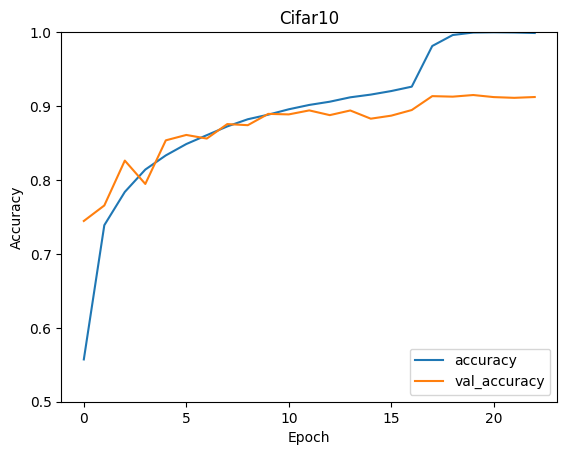

In [10]:

hist = [history,history2]
acc_list = [acc for i in hist for acc in i.history['accuracy']]
val_acc_list = [acc for i in hist for acc in i.history['val_accuracy']]

print(acc_list)

plt.plot(acc_list, label='accuracy')
plt.plot(val_acc_list, label = 'val_accuracy')
plt.title('Cifar10')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

# print(test_loss)
print(test_acc)